# Workflow

En esta práctica vamos a aplicar lo aprendido en esta asignatura para crear un flujo que automatice la descarga, análisis y publicación de los datos utilizando distintas herramientas como Zenodo, github y librerías de python para el análisis de datos

### Librerías necesarias para la práctica

```python
import xml.etree.ElementTree as ET
import requests
import json
import zipfile
```

### Elementos necesarios
* Al menos un fichero CSV
* Un script de análisis de datos en CSV (Publicado en Github)


# Publicación de datos iniciales

Utilizando Zenodo, de forma manual, publicar los datos que se vayan a utilizar.

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>Utilizar Communities para localizar más facilmente los datos</p>
</div>


# Publicación de script de Análisis

En Github + Zenodo

# Descarga de datos

Desde Zenodo, utilizando los métodos conocidos (OAI-PMH, API)

Pista: url+'?verb=ListRecords&set=nombre_set

In [2]:
import requests
import json
import csv
from datetime import datetime
import xml.etree.cElementTree as ET

Un par de funciones para búsqueda

In [3]:
def search_dataset(url,oai_set,metadata_format):
    """Search the datasets identifiers in the defined set
        Parameters
        ----------
        url : string
            OAI-PMH endpoint url
        oai_set : string
            OAI-PMH set where the datasets will be searched
        metadata_format : string
            Selected metadata format to search
        Returns
        -------
        dataset_ids : array 
            Dataset IDs
    """
    #Define bounds to search in specific set
    bounds = "&set="+oai_set
    oai = requests.get(url+'?verb=ListRecords&metadataPrefix='+metadata_format+bounds)

    oaiTree = ET.ElementTree(ET.fromstring(oai.text.encode('utf-8')))
    item = oaiTree.findall('.//{http://datacite.org/schema/kernel-3}identifier')
    return item

In [4]:
def get_oai_metadata_formats(url):
    """Lists the available metadata formats
        Parameters
        ----------
        url : string
            OAI-PMH endpoint url
        Returns
        -------
        metadata_formats : 
            Name of the downloaded file(s).
    """
    metadata_formats = []
    oai_verb = '?verb=ListMetadataFormats'
    oai = requests.get(url + oai_verb) #Peticion al servidor
    xmlTree = ET.ElementTree(ET.fromstring(oai.text))
    iterator = xmlTree.iter()
    for elem in iterator:
        if (elem.tag == '{http://www.openarchives.org/OAI/2.0/}metadataPrefix'):
            metadata_formats.append(elem.text)
    return metadata_formats

In [5]:
def check_dataset(ids,api_url,tipo):
    """Checks if the available datasets satisfy the dates and location req
        Parameters
        ----------
        ids : array
            List of dataset ids
        api_url : string
            API to get dataset metadata
        tipo : string
            type of file to download
        Returns
        -------
        downloaded_datasets : array 
            List of downloaded datasets
    """
    file_list = []
    for i in ids:
        headers = {'accept': 'application/json'}
        #TODO Manage different types of identifiers (i.text.replace('record', 'api/records'),headers))
        r = requests.get('https://doi.org/'+i.text,headers)
        r = requests.get(r.url.replace('record', 'api/records'),headers)
        for u in r.json()['files']:
            print("Type found: %s" % u['type'])
            if u['type'] == tipo:
                print(u['links']['self'])
                link = u['links']['self']
                file_name = u["key"]
                with open(file_name, "wb") as f:
                    print("Downloading %s" % file_name)
                    response = requests.get(link, stream=True)
                    total_length = response.headers.get('content-length')

                    if total_length is None: # no content length header
                        f.write(response.content)
                    else:
                        dl = 0
                        total_length = int(total_length)
                        for data in response.iter_content(chunk_size=4096):
                            dl += len(data)
                            f.write(data)
                            done = int(50 * dl / total_length)
                            sys.stdout.write("\r[%s%s]" % ('=' * done, ' ' * (50-done)) )    
                            sys.stdout.flush()
                file_list.append(file_name)
                print("Download complete")     
                                
    return file_list

Busco el dataset

In [15]:
 #Searching datasets OAI-PMH
print("Searching datasets OAI-PMH")
oai_url = 'https://zenodo.org/oai2d'
metadata_formats = get_oai_metadata_formats(oai_url)

#TODO hardcoded
print("Searching Datasets")
oai_set = 'user-cdp'
oai_set='user-djmplrp'
dataset_list = search_dataset(oai_url,oai_set,'oai_datacite3')
print(dataset_list)

print("Checking/download Datasets")
api_url = 'https://doi.org/'

csv_files = check_dataset(dataset_list,api_url,'csv')
print(csv_files)

Searching datasets OAI-PMH
Searching Datasets
[<Element '{http://datacite.org/schema/kernel-3}identifier' at 0x7f2e547ae228>, <Element '{http://datacite.org/schema/kernel-3}identifier' at 0x7f2e547b9c28>]
Checking/download Datasets
Type found: zip


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

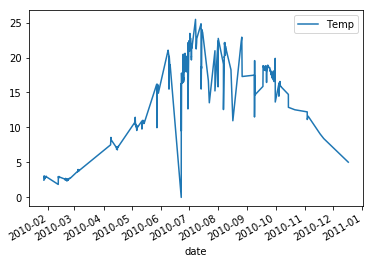

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('amt_2010.csv',delimiter=';')
data['date'] = pd.to_datetime(data['date'])
data.plot(x='date', y='Temp')
plt.show()

Number of arguments: 2 arguments
Argument List:['plot.py', 'amt_2010.csv']


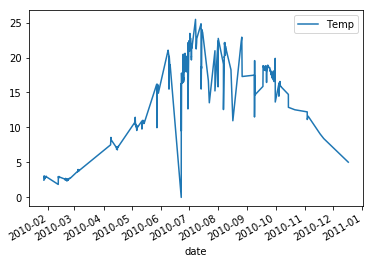

In [40]:
%run -i plot.py amt_2010.csv

In [10]:
ls

amt_2010.csv  M3.02Workflow.ipynb  M3.02Workflow_resuelto.ipynb  README.md


# Descarga de código

Desde Zenodo, utilizando los métodos conocidos (OAI-PMH, API)

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>Zenodo guarda un zip con el código</p>
</div>

In [52]:
 #Searching code OAI-PMH
print("Searching software OAI-PMH")
oai_url = 'https://zenodo.org/oai2d'
metadata_formats = get_oai_metadata_formats(oai_url)

#TODO hardcoded
print("Searching Software")
oai_set = 'user-cdp'
dataset_list = search_dataset(oai_url,oai_set,'oai_datacite')
print(dataset_list)

print("Checking/download Datasets")
api_url = 'https://doi.org/'

zip_files = check_dataset(dataset_list,api_url,'zip')
print(zip_files)

Searching software OAI-PMH
Searching Software
[<Element '{http://datacite.org/schema/kernel-3}identifier' at 0x7f158eb0e0e8>, <Element '{http://datacite.org/schema/kernel-3}identifier' at 0x7f158fb9bd68>, <Element '{http://datacite.org/schema/kernel-3}identifier' at 0x7f158fba3c78>, <Element '{http://datacite.org/schema/kernel-3}identifier' at 0x7f159f568598>, <Element '{http://datacite.org/schema/kernel-3}identifier' at 0x7f158fbaabd8>, <Element '{http://datacite.org/schema/kernel-3}identifier' at 0x7f158fbd99f8>]
Checking/download Datasets
Type found: xml
Type found: nc
Type found: zip
https://zenodo.org/api/files/eb080151-e76f-4523-99fc-c2bc8638115c/ferag/csvprinter-1.01.zip
[==================================================]Download complete
Type found: xml
Type found: csv
Type found: csv
['ferag/csvprinter-1.01.zip']


In [53]:
import zipfile
with zipfile.ZipFile("ferag/csvprinter-1.01.zip","r") as zip_ref:
    zip_ref.extractall(".")

In [55]:
ls ferag-csvprinter-59552e7

plot.py  README.md


# Análisis de los datos

Producir fichero: Otro CSV, imagen, etc

Number of arguments: 2 arguments
Argument List:['ferag-csvprinter-59552e7/plot.py', 'amt_2010.csv']


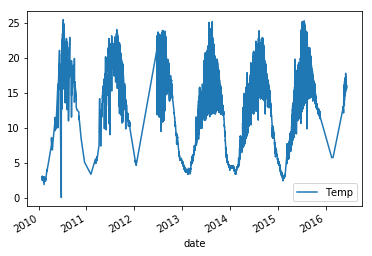

In [56]:
%run -i ferag-csvprinter-59552e7/plot.py amt_2010.csv

# Publicación de los Datos

Utilizando la API de Zenodo

¿Puedes replicar ese workflow en un sólo bloque con otros datos?